<a href="https://colab.research.google.com/github/Carlton756/Data_Analysis_Business_Insights/blob/main/Data_Analysis_Business_Insight_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# importing pandas
import pandas as pd
# assigning csv file to dataframe
df = pd.read_csv("/content/sales_data victoriasol_cleaned.csv")
df.head()



,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
0,1001,05/01/2024,C001,Laptop,Electronics,1,800,800,Credit Card,North
1,1002,10/01/2024,C002,Smartphone,Electronics,2,600,1200,Cash,South
2,1003,12/01/2024,C003,Headphones,Electronics,1,100,100,PayPal,West
3,1004,05/02/2024,C004,Tablet,Electronics,1,500,500,Debit Card,East
4,1005,08/02/2024,C005,Book,Books,3,20,60,Credit Card,North


In [53]:
# checking the columns that exist in dataframe
df.columns

Index(['Transaction_ID', 'Date', 'Customer_ID', 'Product', 'Category',
       'Quantity', 'Price', 'Total_Amount', 'Payment_Method', 'Region'],
      dtype='object')

In [54]:
# checking the number of null values that exist in each column
df.isnull().sum()

,0
Transaction_ID,0
Date,0
Customer_ID,0
Product,0
Category,0
Quantity,0
Price,0
Total_Amount,0
Payment_Method,0
Region,0


In [55]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Transaction_ID  20 non-null     int64 
 1   Date            20 non-null     object
 2   Customer_ID     20 non-null     object
 3   Product         20 non-null     object
 4   Category        20 non-null     object
 5   Quantity        20 non-null     int64 
 6   Price           20 non-null     int64 
 7   Total_Amount    20 non-null     int64 
 8   Payment_Method  20 non-null     object
 9   Region          20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [56]:
# statistical summary
df.describe()

,Transaction_ID,Quantity,Price,Total_Amount
count,20.00000,20.000000,20.000000,20.000000
mean,1010.50000,1.550000,325.500000,396.500000
std,5.91608,0.887041,302.484884,390.418466
min,1001.00000,1.000000,20.000000,25.000000
25%,1005.75000,1.000000,43.750000,78.750000
50%,1010.50000,1.000000,200.000000,200.000000
75%,1015.25000,2.000000,600.000000,650.000000
max,1020.00000,4.000000,800.000000,1200.000000


In [57]:
# a look into correlation that exists between numerical features
numeric_df = df.select_dtypes(include=['number'])
display(numeric_df.corr())

,Transaction_ID,Quantity,Price,Total_Amount
Transaction_ID,1.000000,0.105307,-0.129261,-0.202232
Quantity,0.105307,1.000000,-0.423792,-0.199315
Price,-0.129261,-0.423792,1.000000,0.892401
Total_Amount,-0.202232,-0.199315,0.892401,1.000000


In [58]:
# importing visualization libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [59]:
# selecting only numerical columns
df.select_dtypes(include = "int64")

,Transaction_ID,Quantity,Price,Total_Amount
0,1001,1,800,800
1,1002,2,600,1200
2,1003,1,100,100
3,1004,1,500,500
4,1005,3,20,60
5,1006,1,800,800
6,1007,2,50,100
7,1008,1,25,25
8,1009,1,200,200
9,1010,2,20,40


In [60]:
# assigning numerical columns to a dataframe
numerical_df = df.select_dtypes(include = "int64")
numerical_df.head()

,Transaction_ID,Quantity,Price,Total_Amount
0,1001,1,800,800
1,1002,2,600,1200
2,1003,1,100,100
3,1004,1,500,500
4,1005,3,20,60


In [61]:
# I could have used the following code below as well to generate just the numerical columns from the original datframe  df
df.select_dtypes(include=[np.number]).head()


,Transaction_ID,Quantity,Price,Total_Amount
0,1001,1,800,800
1,1002,2,600,1200
2,1003,1,100,100
3,1004,1,500,500
4,1005,3,20,60


In [62]:
corr_matrix = numerical_df.corr()
corr_matrix

,Transaction_ID,Quantity,Price,Total_Amount
Transaction_ID,1.000000,0.105307,-0.129261,-0.202232
Quantity,0.105307,1.000000,-0.423792,-0.199315
Price,-0.129261,-0.423792,1.000000,0.892401
Total_Amount,-0.202232,-0.199315,0.892401,1.000000


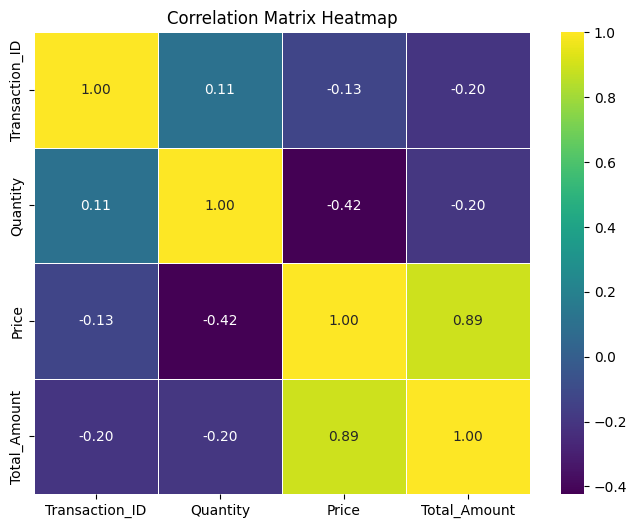

In [63]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidth = 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [64]:
# ensuring that pandas treat the "Date" column as actual dates
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df

,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,800,Credit Card,North
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200,Cash,South
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100,PayPal,West
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500,Debit Card,East
4,1005,2024-02-08,C005,Book,Books,3,20,60,Credit Card,North
5,1006,2024-02-10,C001,Laptop,Electronics,1,800,800,Credit Card,North
6,1007,2024-03-15,C006,Shoes,Clothing,2,50,100,Cash,South
7,1008,2024-03-18,C007,T-Shirt,Clothing,1,25,25,PayPal,West
8,1009,2024-03-20,C008,Smartwatch,Electronics,1,200,200,Debit Card,East
9,1010,2024-04-01,C009,Book,Books,2,20,40,Credit Card,North


In [65]:
# adding year and month columns to dataframe
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df.head()

,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region,Year,Month,Quarter
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,800,Credit Card,North,2024,1,1
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200,Cash,South,2024,1,1
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100,PayPal,West,2024,1,1
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500,Debit Card,East,2024,2,1
4,1005,2024-02-08,C005,Book,Books,3,20,60,Credit Card,North,2024,2,1


In [66]:
# aggregating total sales by month
Month_grouped = df.groupby(['Month', 'Quarter'], as_index = False)['Total_Amount'].sum()
Month_grouped

,Month,Quarter,Total_Amount
0,1,1,2100
1,2,1,1360
2,3,1,325
3,4,2,1740
4,5,2,1025
5,6,2,1380


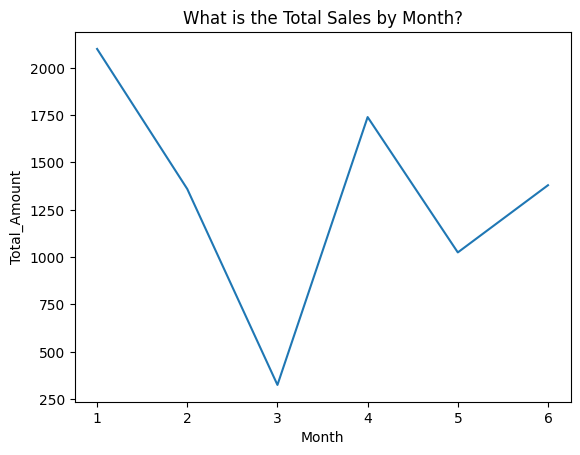

In [67]:
# ploting a line graph showing sales performance across months
sns.lineplot(data = Month_grouped, x = "Month", y = "Total_Amount")
plt.title('What is the Total Sales by Month?')
plt.show()

In [68]:
# aggregating total sales by product category
Category_grouped = df.groupby(['Category', 'Product'], as_index = False)['Total_Amount'].sum()
Category_grouped

,Category,Product,Total_Amount
0,Books,Book,180
1,Clothing,Shoes,150
2,Clothing,T-Shirt,100
3,Electronics,Headphones,200
4,Electronics,Laptop,2400
5,Electronics,Smartphone,3000
6,Electronics,Smartwatch,400
7,Electronics,Tablet,1500


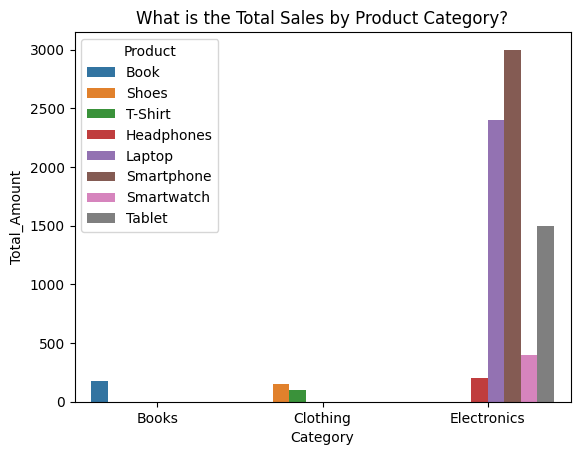

In [69]:
# plotting a bar chart to compare total sales by product categories
sns.barplot(data = Category_grouped, x = "Category", y = "Total_Amount", hue = "Product", legend = True)
plt.title("What is the Total Sales by Product Category?")
plt.show()

In [70]:
# aggregating total sales by payment method
Paymeth_grouped = df.groupby(['Payment_Method', 'Region'], as_index = False)['Total_Amount'].sum()
Paymeth_grouped

,Payment_Method,Region,Total_Amount
0,Cash,South,3225
1,Credit Card,North,2580
2,Debit Card,East,1900
3,PayPal,West,225


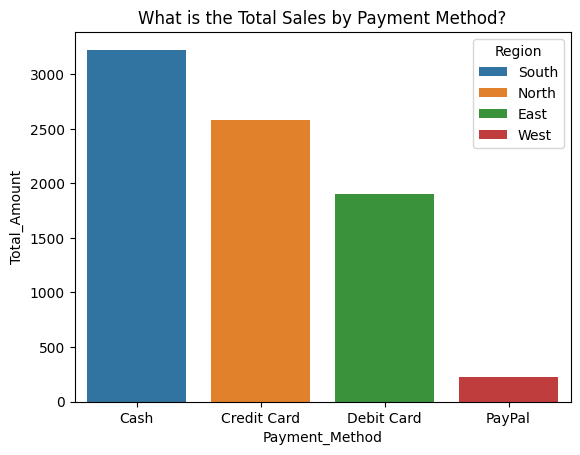

In [71]:
# plotting a bar chart to compare sales by parment methods
sns.barplot(data = Paymeth_grouped, x = "Payment_Method", y = "Total_Amount", hue = "Region", legend = True)
plt.title("What is the Total Sales by Payment Method?")
plt.show()

In [72]:
# aggregating the total sales by region
Region_grouped = df.groupby(["Region", "Category", "Product"], as_index = False)["Total_Amount"].sum()
Region_grouped

,Region,Category,Product,Total_Amount
0,East,Electronics,Smartwatch,400
1,East,Electronics,Tablet,1500
2,North,Books,Book,180
3,North,Electronics,Laptop,2400
4,South,Clothing,Shoes,150
5,South,Clothing,T-Shirt,75
6,South,Electronics,Smartphone,3000
7,West,Clothing,T-Shirt,25
8,West,Electronics,Headphones,200


In [73]:
# plotting a bar chart to compare sales by region
px.bar(Region_grouped, x = "Region", y = "Total_Amount", color = "Product", title = "What is the Total Sales by Region?", hover_data = ["Category", "Product"])